### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="Fig1 The Combined E commerce Dataset.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


## Name : Kanrawee (Kara) Vorametphasuk
## StudentID : 48088544

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [313]:
# your code and solutions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#define function to bold text
def bold_text(text):
  return "\033[1m" + text + "\033[0m"

# before removing the missing data
original_dataset = pd.read_csv('The E-commerce Dataset.csv')

#display dataset description ('display the DataFrame')
original_dataset.head()
original_dataset.describe()

,userId,timestamp,rating,helpfulness,item_id,item_price,user_city
count,20000.000000,20000.000000,19983.000000,19978.000000,20000.000000,20000.000000,20000.000000
mean,5500.909450,59025.503550,3.701847,2.596306,41.789950,82.180847,19.393200
std,3343.265765,37967.900334,1.404619,1.750681,27.271524,42.242699,11.626928
min,0.000000,10100.000000,1.000000,0.000000,0.000000,12.000000,0.000000
25%,1995.750000,21500.000000,3.000000,0.000000,17.000000,48.250000,9.000000
50%,5898.000000,52701.000000,4.000000,4.000000,41.000000,72.000000,19.000000
75%,8408.250000,91600.000000,5.000000,4.000000,65.000000,126.500000,29.000000
max,10808.000000,123199.000000,5.000000,4.000000,88.000000,149.000000,39.000000


In [322]:
#Count null or missing values
userId_null_count = original_dataset['userId'].isna().sum()
timestamp_null_count = original_dataset['timestamp'].isna().sum()
review_null_or_none_count = original_dataset['review'].isna().sum() + len(original_dataset[original_dataset["review"] == "none"])
item_null_count = original_dataset['item'].isna().sum()
rating_null_count = original_dataset['rating'].isna().sum()
helpfulness_null_count = original_dataset['helpfulness'].isna().sum()
gender_null_count = original_dataset['gender'].isna().sum()
category_null_count = original_dataset['category'].isna().sum()
itemId_null_count = original_dataset['item_id'].isna().sum()
item_price_null_count = original_dataset['item_price'].isna().sum()
user_city_null_count = original_dataset['item_price'].isna().sum()

#Remove rows with null or missing values
# Remove rows if gender/rating/helpfulness is missing
original_dataset = pd.read_csv('The E-commerce Dataset.csv')
analysis_dataset = original_dataset.dropna(subset=["gender", "rating", "helpfulness"])
# Remove rows if review is "none"
analysis_dataset = analysis_dataset[analysis_dataset["review"] != "none"]

#calculate dataset statistics
original_dataset_length = len(original_dataset)
analysis_dataset_length = len(analysis_dataset)
total_analysis_dataset_percent_of_original = "{:.2f}%".format(analysis_dataset_length / original_dataset_length * 100)

#Display results
#Print the length of the data before removing rows with missing data
print(bold_text('Original Dataset Row Count:'), original_dataset_length)
#Print the length of the data after removing rows with missing data

#Print percantage of null rows of original dataset
print(bold_text('Clean Dataset Row Count:'), analysis_dataset_length)
print(analysis_dataset_length, '/', original_dataset_length, '(', total_analysis_dataset_percent_of_original, ')', 'rows had null values or a missing review description') 

#Display DataFrame
data = {'Count of Null or Missing Values': [gender_null_count, rating_null_count, helpfulness_null_count, review_null_or_none_count, userId_null_count, timestamp_null_count, item_null_count, category_null_count, itemId_null_count, item_price_null_count, user_city_null_count]}
row_names = ['gender', 'rating', 'helpfulness', 'review', 'userId', 'timestamp', 'item', 'category', 'item_id', 'item_price', 'user_city']
dataframe = pd.DataFrame(data, index=row_names)

dataframe 

Original Dataset Row Count: 20000
Clean Dataset Row Count: 19916
19916 / 20000 ( 99.58% ) rows had null values or a missing review description


,Count of Null or Missing Values
gender,27
rating,17
helpfulness,22
review,18
userId,0
timestamp,0
item,0
category,0
item_id,0
item_price,0


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [328]:
# Q2.1 Provide the total number of unique users, unique reviews, unique items, and unique categories
# Calculate
#unique users, items and categories are distinct entities with unique Ids.
unique_users = analysis_dataset['userId'].nunique()
unique_items = analysis_dataset['item'].nunique()
unique_categories = analysis_dataset['category'].nunique()
unique_review = analysis_dataset['review'].nunique()
# Unique reviews are reviews by different users, or for different items.
# Question: Should we consider two reviews for the same item at different times unique?
# Let's assume only the latest review from a user should be used, and reviews with earlier timestamps are duplicates too.
    n = 13581
print((datetime.utcfromtimestamp(0) + timedelta(n)).strftime("%Y-%m-%d"))

#Display DataFrame
data = {'Unique Count': [unique_users, unique_reviews, unique_items, unique_categories]}
row_names = ['Users', 'Reviews', 'Items', 'Categories']
dataframe = pd.DataFrame(data, index=row_names)

dataframe


,Unique Count
Users,8562
Reviews,19459
Items,89
Categories,9


In [383]:
# Q 2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
rating_records = analysis_dataset['rating'].describe()

data = {'Value': [rating_records['count'], rating_records['mean'], rating_records['std'], rating_records['min'], rating_records['25%'],rating_records['50%'], rating_records['75%'], rating_records['max']]}
row_names = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
dataframe = pd.DataFrame(data, index=row_names)

print("Most ratings are quite positive, indicating users are likely happy with the products and price, with the 50th percentile of 4 stars")
print("A low proportion of ratings are poor, with the 25th percentile at 3 stars, and the mean at 3.7 stars:")

dataframe

Most ratings are quite positive, with the 50th percentile of 4 stars
A low proportion of ratings are poor, with the 25th percentile at 3 stars, and the mean at 3.7 stars:


,Value
count,19916.000000
mean,3.701798
std,1.404451
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [389]:
# Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
# Using groupby function to analyze the number of items rated by different genders

print("There is no demonstrated correlation between gender and count of value of ratings.")
analysis_dataset.groupby('gender')['rating'].describe()

#item_by_gender_data = analysis_dataset.groupby('item')['gender']

#item_by_gender_data.describe(include=[np.number])


There is no demonstrated correlation between gender and count of value of ratings.


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,9793.0,3.717451,1.395355,1.0,3.0,4.0,5.0,5.0
M,10123.0,3.686654,1.413098,1.0,3.0,4.0,5.0,5.0


In [399]:
# Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
## Using groupby function to analyze the number of ratings that received by each items

print("There is significant variance in the ratings recieved.")
print("There is no clear pattern on rating correlating to the specific item.")
rating_stats_by_item = analysis_dataset.groupby('item')['rating'].describe()
sorted_stats_by_median = rating_stats_by_item.sort_values(by='count', ascending=False)
sorted_stats_by_median


There is significant variance in the ratings recieved.
There is no clear pattern on rating correlating to the specific item.


,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),939.0,2.500532,1.368528,1.0,1.0,2.0,4.0,5.0
All Advantage,657.0,3.412481,1.541706,1.0,2.0,4.0,5.0,5.0
eBay,596.0,4.333893,0.949618,1.0,4.0,5.0,5.0,5.0
McDonald's,415.0,2.698795,1.256240,1.0,2.0,3.0,4.0,5.0
NetZero,350.0,3.074286,1.360588,1.0,2.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
The Legend Of Zelda Ocarina Of Time for Nintendo 64,143.0,4.706294,0.729964,1.0,5.0,5.0,5.0,5.0
How the Grinch Stole Christmas,143.0,3.874126,1.260824,1.0,3.0,4.0,5.0,5.0
Applebee's,141.0,3.822695,1.272139,1.0,3.0,4.0,5.0,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

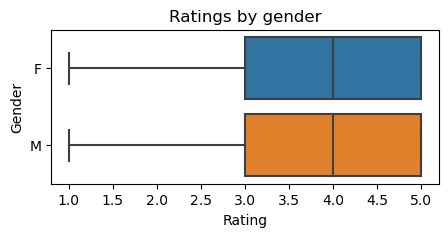

There is no demonstrated correlation between gender and count of value of ratings.


In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
sns.boxplot(x='rating', y='gender', data=df1_clean)
plt.title('Ratings by gender')
plt.xlabel('Rating')
plt.ylabel('Gender')

plt.show()
print("There is no demonstrated correlation between gender and count of value of ratings.")


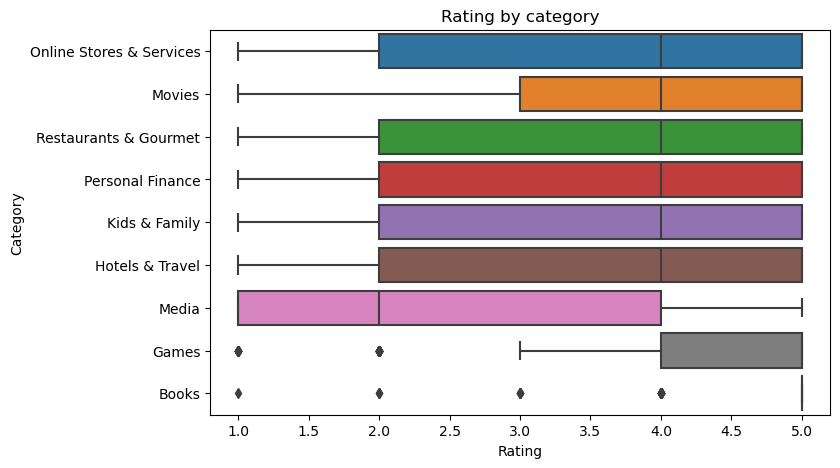

In [404]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='rating', y='category', data=df1_clean)
plt.title('Rating by category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

For most categories, the 50th percentile ratings is 4.00, consistent with the above findings that most ratings are quite positive.
Games, and especially books are rated consistently highly.
Media stands out as the worst rated category.

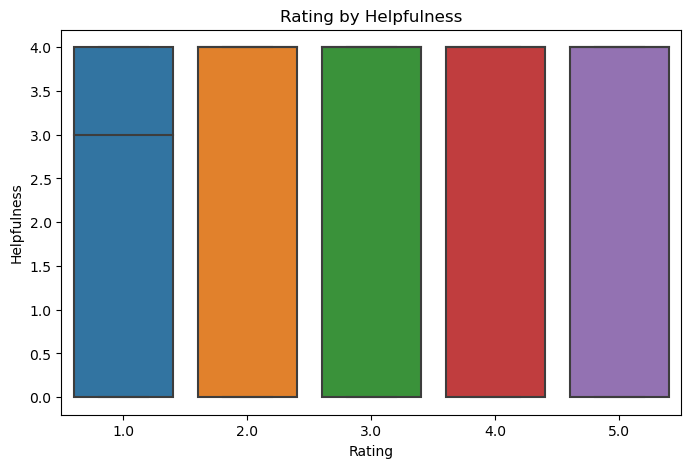

Helpfulness has a broad distribution, never reaching 5 stars.
There is no demonstrated correlation between rating and helpfulness.
Helpfulness never reaching 5 stars may indicate users always felt something was missing from reviews and they weren't fully helpful.


In [407]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='rating', y='helpfulness', data=df1_clean)
plt.title('Rating by Helpfulness')
plt.xlabel('Rating')
plt.ylabel('Helpfulness')
plt.show()

print("Helpfulness has a broad distribution, never reaching 5 stars.")
print("There is no demonstrated correlation between rating and helpfulness.")
print("Helpfulness never reaching 5 stars may indicate users always felt something was missing from reviews and they weren't fully helpful.")

In [412]:
#Drafted investigation:
#import seaborn as sns
#import matplotlib.pyplot as plt

#plt.figure(figsize=(5, 2))
#sns.boxplot(x='rating', y='item_price', data=df1_clean)
#plt.title('Ratings by gender')
#plt.xlabel('Rating')
#plt.ylabel('Item Price')

#plt.show()
#print("I also investigated a theory that lower priced items may recieve worse ratings. Perhaps there is some correlation between lower prices and rating, but it's small.")

#Final Summary:
print(bold_text("In summary"))
print("No significant correlations were found between gender, or helpfulness and rating.")
print("Significant correlations between category and rating were found, with Media performing poorly while books and games did very well")
print("Perhaps more investment into the books and games category and less into media would be more successful, and create happier customers.")

In summary
No significant correlations were found between gender, or helpfulness and rating.
Significant correlations between category and rating were found, with Media performing poorly while books and games did very well
Perhaps more investment into the books and games category and less into media would be more successful, and create happier customers.


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [418]:
# your code and solutions
dataset_without_outlier = analysis_dataset[analysis_dataset['helpfulness'] > 2]

unhelpful_review_count = len(analysis_dataset) - len(dataset_without_outlier)
unhelpful_review_percent = format(unhelpful_review_count/cleanReviewCount, ".0%")
print(unhelpful_review_count, '/', cleanReviewCount, '(', unhelpful_review_percent, ') Reviews had a helpfullness of 2 or less.')

userId = dataset_without_outlier['userId'].value_counts()
userId_filter = userId[userId >= 7].index
total_userId_filter = len(userId) - len(userId_filter)
df1_without_outlier = dataset_without_outlier[dataset_without_outlier['userId'].isin(userId_filter)]
total_userId_filter_percent = format(total_userId_filter/cleanReviewCount, ".0%")
print(total_userId_filter, '/', cleanReviewCount, '(', total_userId_filter_percent, ') Users who rate less than 7 items.')


item_id = dataset_without_outlier['item_id'].value_counts()
items_id_filter = item_id[item_id >= 11].index
total_itemsid_filter = len(item_id) - len(items_id_filter)
df1_without_outlier = dataset_without_outlier[dataset_without_outlier['item_id'].isin(items_id_filter)]
total_itemsid_percent = format(total_itemsid_filter/cleanReviewCount, ".0%")
print(total_itemsid_filter, '/', cleanReviewCount, '(', total_itemsid_percent, ') Items that receives less than 11 ratings.')


print (' ')

unhelpful_review_count = len(analysis_dataset) - len(dataset_without_outlier)
unhelpful_review_percent = format(unhelpful_review_count/cleanReviewCount, ".0%")
print(unhelpful_review_count, '/', cleanReviewCount, '(', unhelpful_review_percent, ') Reviews were outliers based on the criteria of:')
print(' 1. Helpfulness of no more than 2.')
print(' 2. Users who rate less than 7 items.')
print(' 3. Items that receives less than 11 ratings.')
print (' ')
print('Leaving' + "\033[1m", len(dataset_without_outlier), "\033[0m" + 'of the initial', cleanReviewCount, 'reviews which had all values (rating, review and helpfulness) included in our merged dataset.')

6273 / 19916 ( 31% ) Reviews had a helpfullness of 2 or less.
6268 / 19916 ( 31% ) Users who rate less than 7 items.
0 / 19916 ( 0% ) Items that receives less than 11 ratings.
 
6273 / 19916 ( 31% ) Reviews were outliers based on the criteria of:
 1. Helpfulness of no more than 2.
 2. Users who rate less than 7 items.
 3. Items that receives less than 11 ratings.
 
Leaving 13643 of the initial 19916 reviews which had all values (rating, review and helpfulness) included in our merged dataset.
